In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import normaltest
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

Link video : https://binusianorg-my.sharepoint.com/personal/johensen_charles_binus_ac_id/_layouts/15/guestaccess.aspx?share=EeSTPVYMJQxDiy38CEH3jb4BY9tHoo74AQvngoppj58Y9g&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=BstoQg   

Link folder: https://binusianorg-my.sharepoint.com/personal/johensen_charles_binus_ac_id/_layouts/15/guestaccess.aspx?share=EmIPh5GSsv5LsikMZQWPlGsBi_sB3_Gq7J9x3JQZCyt8HA

## EDA

Fitur pada data:
1. **PM10**: Particulate Matter 10
2. **PM2.5**: Particulate Matter 2.5
3. **CO**: Carbon Monoxide
4. **CO2**: Carbon Dioxide
5. **NO**: Nitric Oxide
6. **NO2**: Nitrogen Dioxide
7. **NOx**: Nitrogen Oxides
8. **NH3**: Ammonia
9. **SO2**: Sulfur Dioxide
10. **Temp**: Temperature
11. **AT**: Air Temperature (**Target Variabel**)
12. **BP**: Barometric Pressure
13. **Benzene**: Concentration of Benzene in the air
14. **Toluene**: Concentration of Toluene in the air
15. **VWS**: Wind Speed
16. **Variance**: Variance
17. **WD**: Wind Direction
18. **WS**: Wind Speed
19. **Xylene**: Concentration of Xylene in the air
20. **CH4**: Methane
21. **Eth-Benzene**: Concentration of Ethylbenzene in the air
22. **Gust**: Wind Gust
23. **HCHO**: Formaldehyde
24. **Hg**: Mercury
25. **MH**: Mixing Height
26. **MP-Xylene**: Meta-Para Xylene
27. **NMHC**: Non-Methane Hydrocarbons
28. **O Xylene**: Ortho-Xylene
29. **Ozone**: Ozone Concentration
30. **Power**: Power Consumption
31. **RF**: Rainfall
32. **RH**: Relative Humidity
33. **SPM**: Suspended Particulate Matter
34. **SR**: Solar Radiation
35. **THC**: Total Hydrocarbons

In [32]:
df = pd.read_csv('A_1/AP003.csv', parse_dates=["From Date", "To Date"], index_col="From Date")
df

,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
From Date,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 20:00:00,2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 21:00:00,2023-03-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To Date hanya berisi From Date + 1 hours, jadi bisa didrop (redundant)

In [42]:
# Remove duplicate data
df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)

# Remove To Date
df = df.drop(columns=["To Date"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PM2.5 (ug/m3)    44691 non-null  float64
 1   PM10 (ug/m3)     45018 non-null  float64
 2   NO (ug/m3)       46252 non-null  float64
 3   NO2 (ug/m3)      45705 non-null  float64
 4   NOx (ppb)        47040 non-null  float64
 5   NH3 (ug/m3)      45756 non-null  float64
 6   SO2 (ug/m3)      43604 non-null  float64
 7   CO (mg/m3)       46993 non-null  float64
 8   Ozone (ug/m3)    45309 non-null  float64
 9   Benzene (ug/m3)  46678 non-null  float64
 10  Toluene (ug/m3)  46678 non-null  float64
 11  Temp (degree C)  46335 non-null  float64
 12  RH (%)           46520 non-null  float64
 13  WS (m/s)         46522 non-null  float64
 14  WD (degree)      44710 non-null  float64
 15  SR (W/mt2)       47045 non-null  float64
 16  BP (mmHg)        43680 non-null  float64
 17  VWS (m/s)   

In [44]:
missing_values = df.isnull().sum()
missing_values

PM2.5 (ug/m3)      5709
PM10 (ug/m3)       5382
NO (ug/m3)         4148
NO2 (ug/m3)        4695
NOx (ppb)          3360
NH3 (ug/m3)        4644
SO2 (ug/m3)        6796
CO (mg/m3)         3407
Ozone (ug/m3)      5091
Benzene (ug/m3)    3722
Toluene (ug/m3)    3722
Temp (degree C)    4065
RH (%)             3880
WS (m/s)           3878
WD (degree)        5690
SR (W/mt2)         3355
BP (mmHg)          6720
VWS (m/s)          3357
AT (degree C)      4030
RF (mm)            3252
Xylene (ug/m3)     3742
dtype: int64

Sangat banyak missing value, paling besar pada kolom SO2 hingga 13,48% dari datanya merupakan missing value. Sangat disayangkan jika datanya dibuang begitu saja :(

<Axes: >

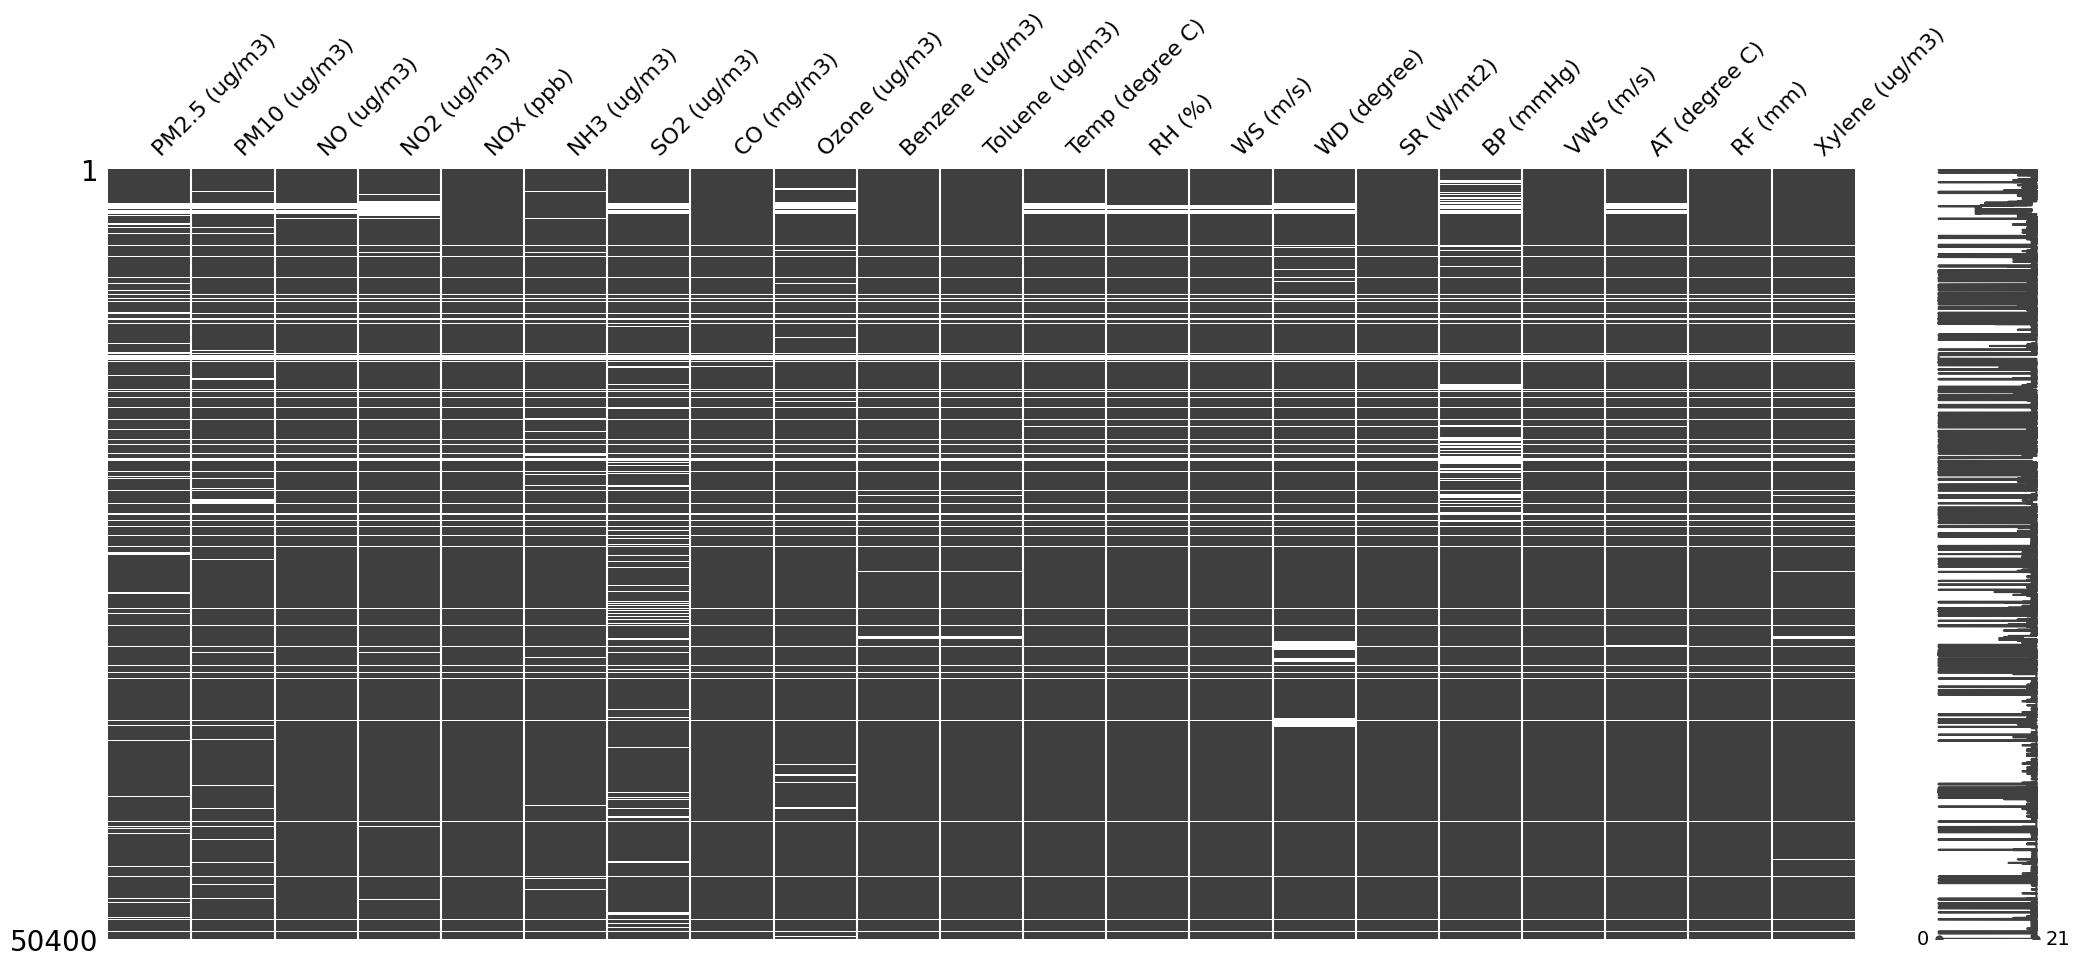

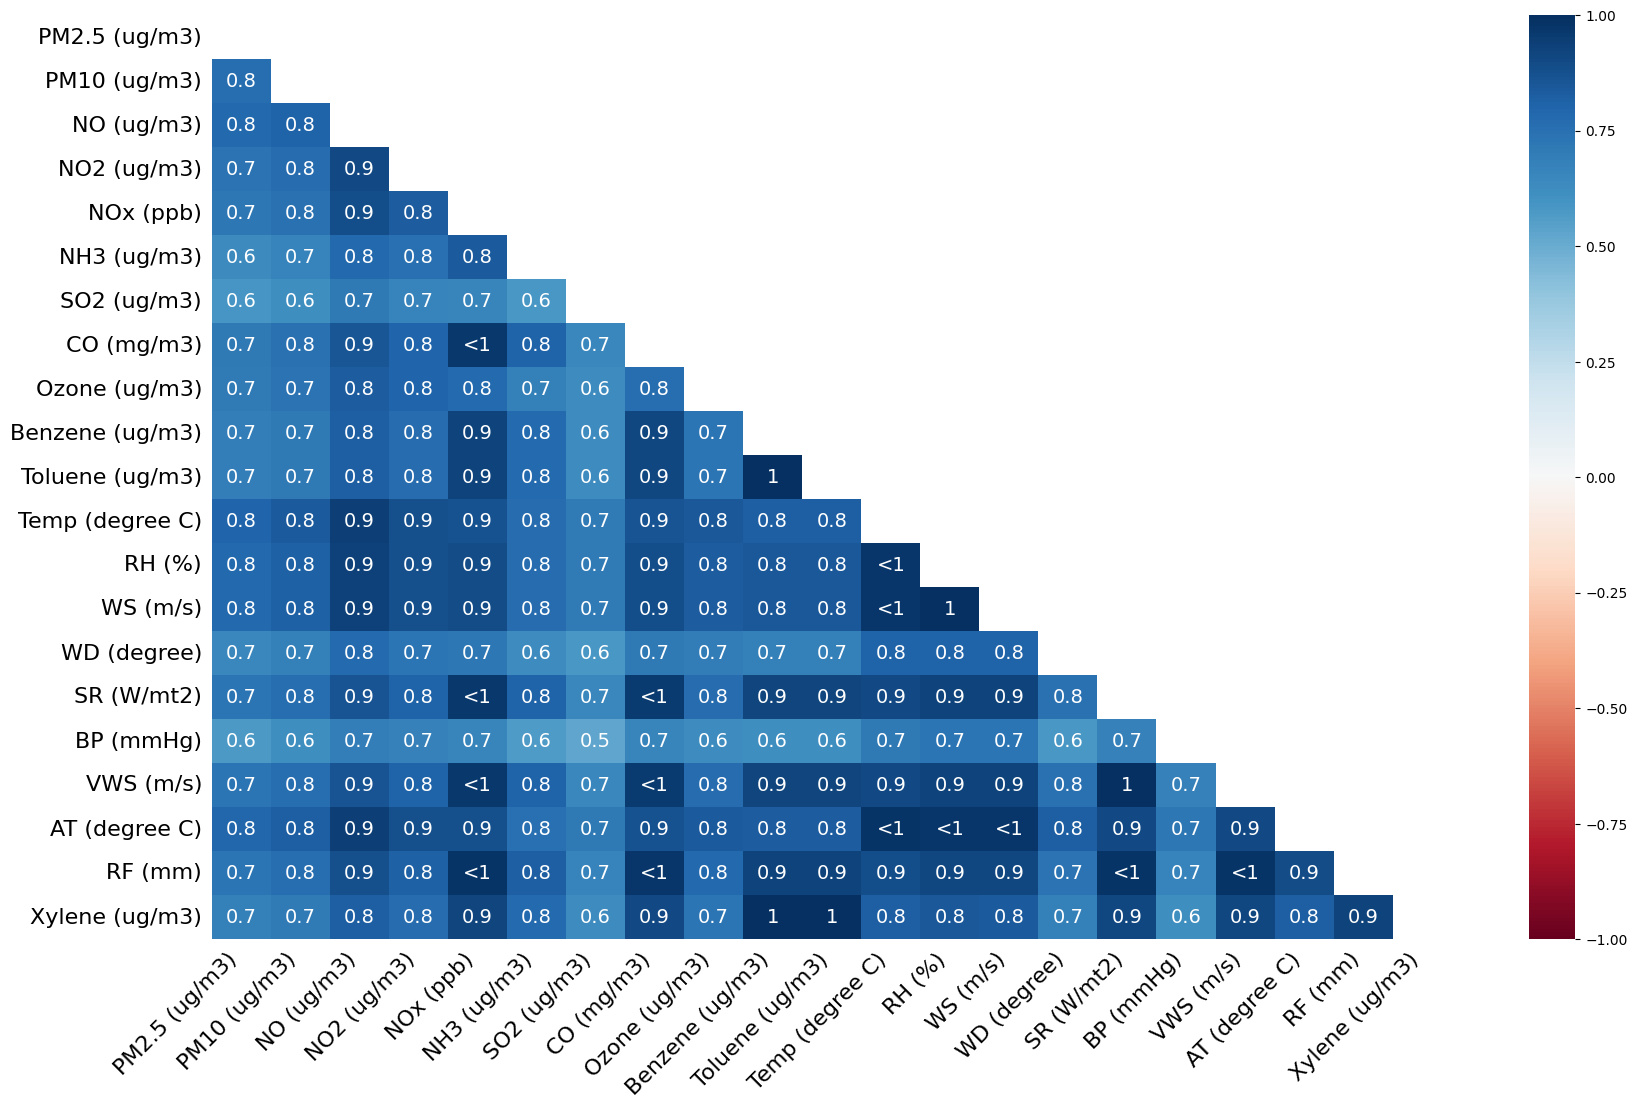

In [45]:
msno.matrix(df)
msno.heatmap(df)


dari matrix tidak terlihat pola khusus pada missing valuenya, bisa termasuk MCAR (missing completely at random) atau MAR (missing at random), dengan kata lain bisa dilakukan imputasi dengan aman  
Jika dilihat dari korelasi antar fiturnya, secara keseluruhan memiliki korelasi positif yang cukup kuat (rata rata berwarna biru dan biru gelap). Sehingga memungkinkan untuk mengimputasi dengan bantuan dari fitur lainnya, tetapi perlu cek terlebih dahulu apakah ada outlier untuk menentukan jenis imputasi.  
Terlihat juga pada korelasi dengan AT (target kita), rata rata memiliki korelasi positif yang kuat, terutama fitur Temp, RH, dan WS.

In [46]:
# Memisahkan Categorical dan Numerical
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: []
Numeric: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']


Pisahkan mana yang numerikal untuk cek distribusi dan outliers

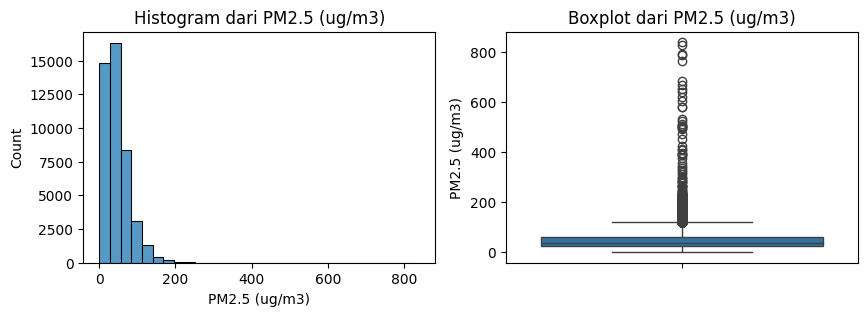

PM2.5 (ug/m3) - Skewness: 3.8120308404033265
PM2.5 (ug/m3) - Kurtosis: 48.48340018970142


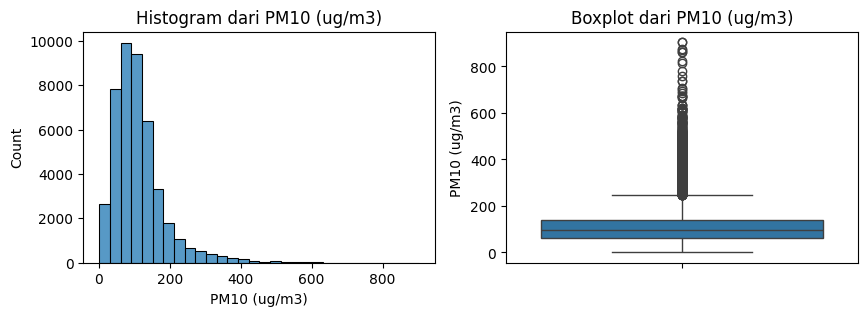

PM10 (ug/m3) - Skewness: 2.1486766161738498
PM10 (ug/m3) - Kurtosis: 8.227009584889002


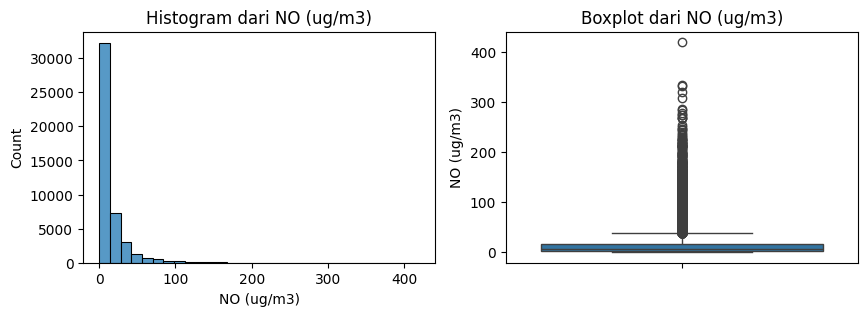

NO (ug/m3) - Skewness: 4.012152541960519
NO (ug/m3) - Kurtosis: 25.31812501114471


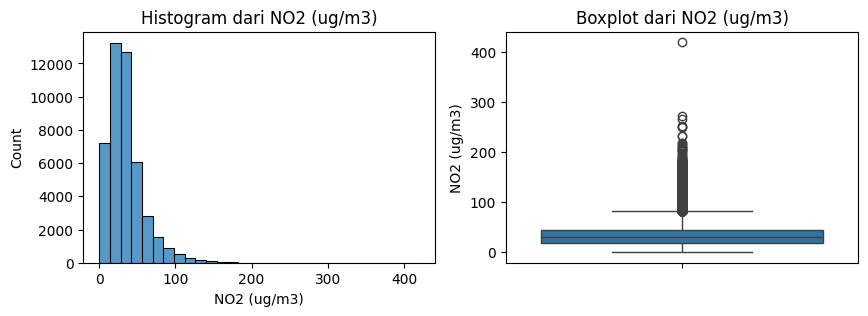

NO2 (ug/m3) - Skewness: 1.927265504801719
NO2 (ug/m3) - Kurtosis: 7.248969095628038


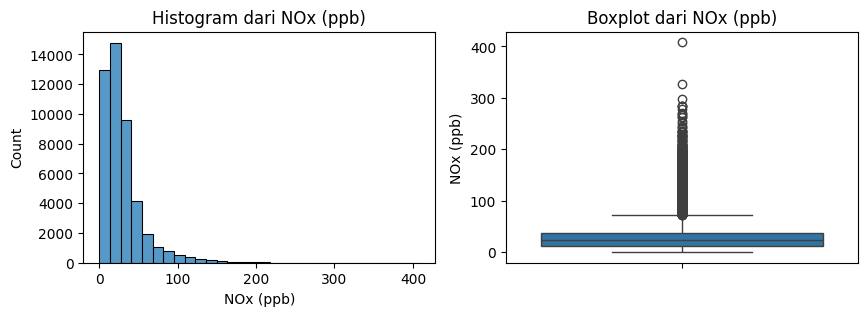

NOx (ppb) - Skewness: 2.5908837540692913
NOx (ppb) - Kurtosis: 10.443009518551188


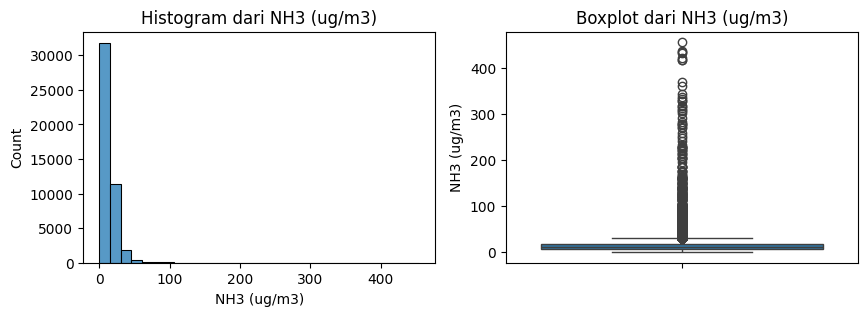

NH3 (ug/m3) - Skewness: 10.591016268361521
NH3 (ug/m3) - Kurtosis: 208.4797057356495


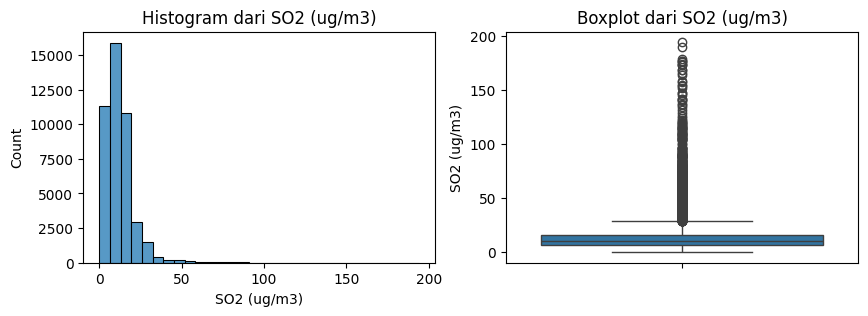

SO2 (ug/m3) - Skewness: 4.648163051137525
SO2 (ug/m3) - Kurtosis: 45.213892212912924


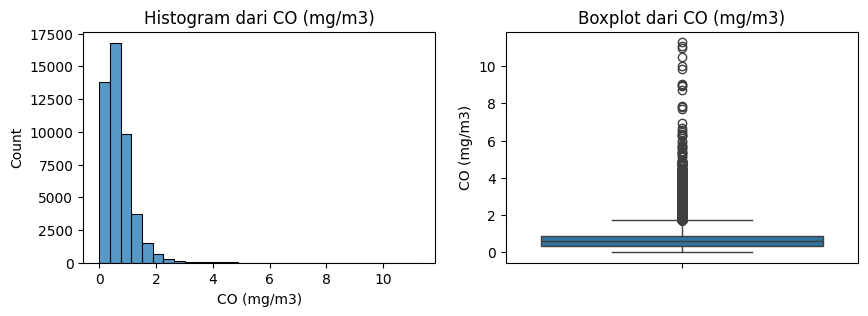

CO (mg/m3) - Skewness: 3.086232178353527
CO (mg/m3) - Kurtosis: 28.728343935521593


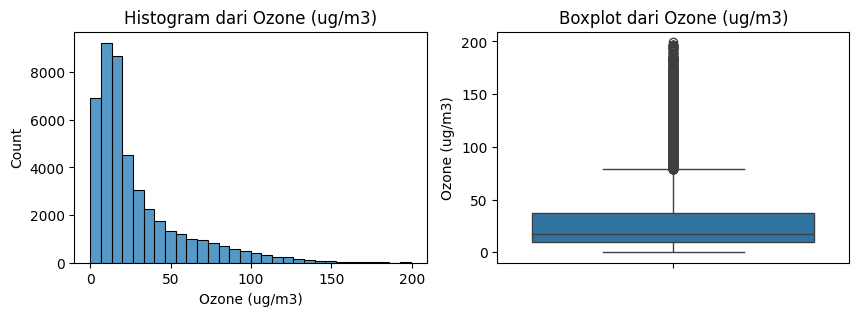

Ozone (ug/m3) - Skewness: 1.8824009979882446
Ozone (ug/m3) - Kurtosis: 3.7433378247036684


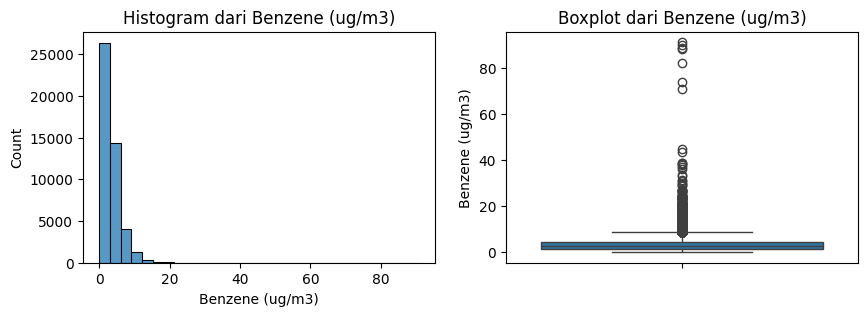

Benzene (ug/m3) - Skewness: 5.031570891167827
Benzene (ug/m3) - Kurtosis: 97.29771288713901


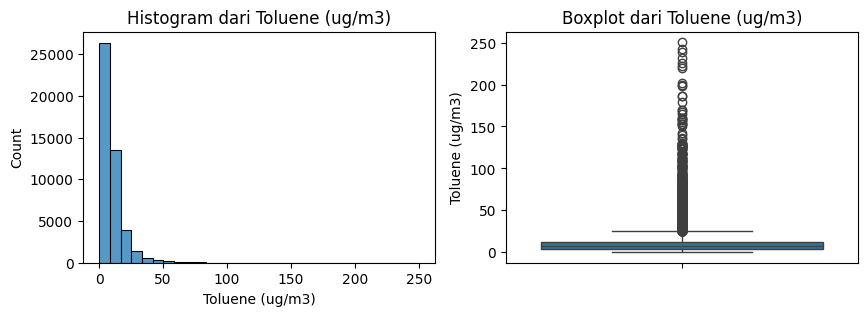

Toluene (ug/m3) - Skewness: 5.3228497794262015
Toluene (ug/m3) - Kurtosis: 59.384152198403164


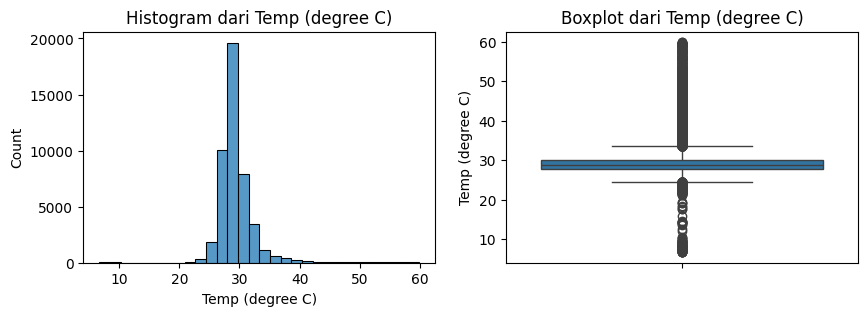

Temp (degree C) - Skewness: 2.8674251310339836
Temp (degree C) - Kurtosis: 22.39783007499976


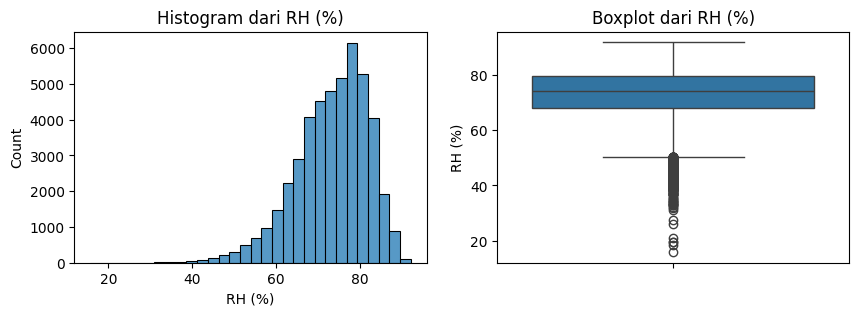

RH (%) - Skewness: -0.7675688099948292
RH (%) - Kurtosis: 0.7524505862734299


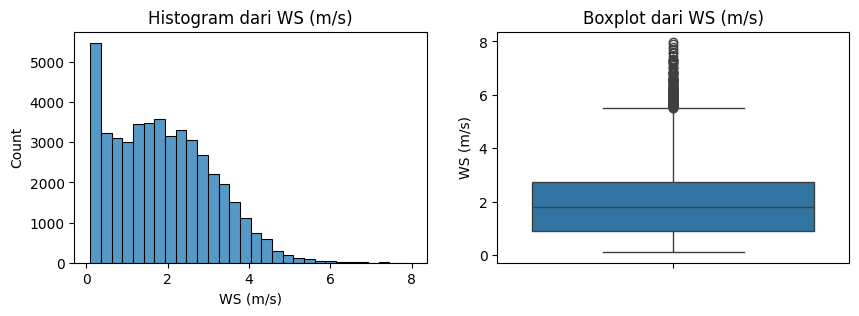

WS (m/s) - Skewness: 0.5570399750015516
WS (m/s) - Kurtosis: -0.1368420211952155


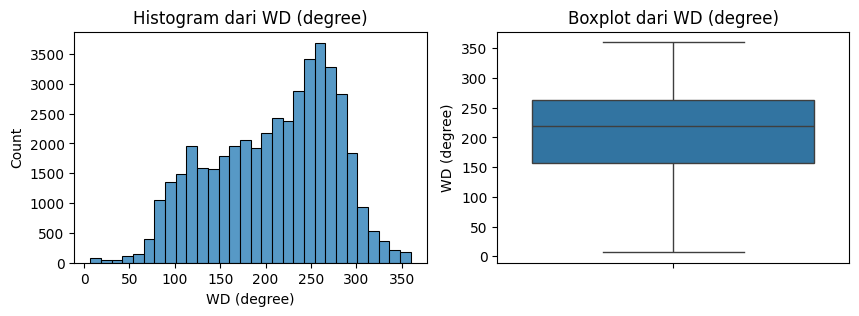

WD (degree) - Skewness: -0.34911852741540333
WD (degree) - Kurtosis: -0.7480644274386905


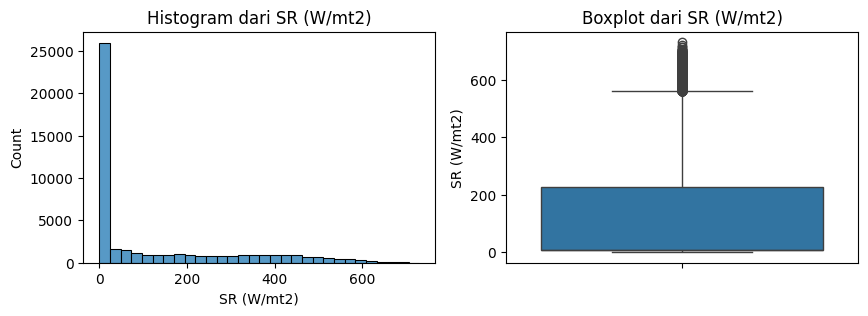

SR (W/mt2) - Skewness: 1.2658550457078357
SR (W/mt2) - Kurtosis: 0.3000403315050213


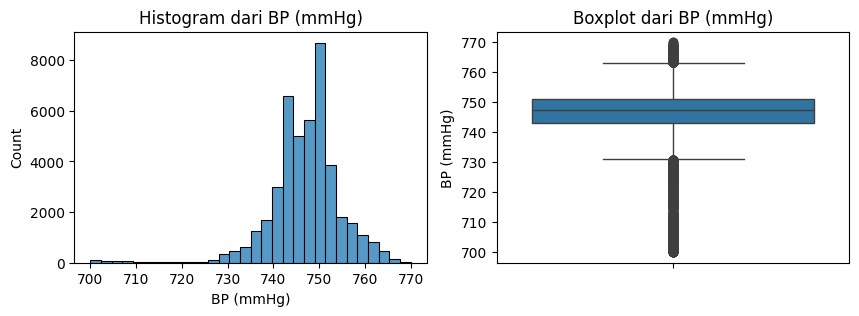

BP (mmHg) - Skewness: -1.2407614524936506
BP (mmHg) - Kurtosis: 6.11967758495874


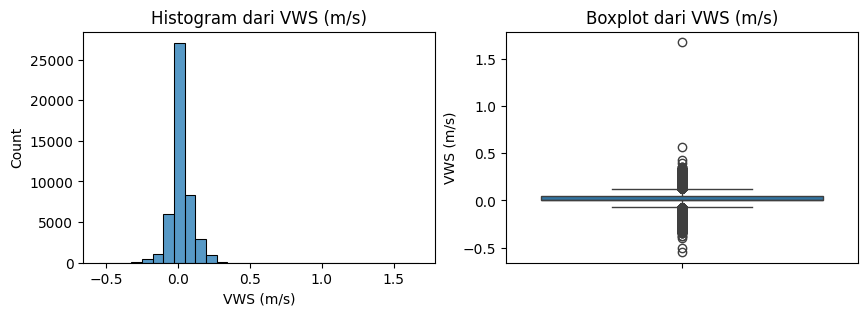

VWS (m/s) - Skewness: 0.36516854095996243
VWS (m/s) - Kurtosis: 8.734654849669555


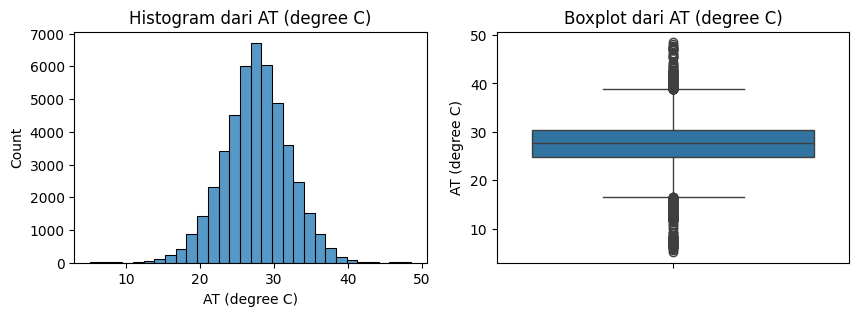

AT (degree C) - Skewness: -0.14990869659051165
AT (degree C) - Kurtosis: 0.7565053084001243


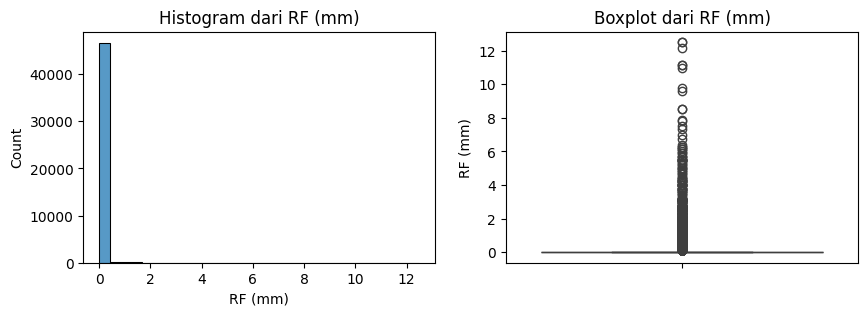

RF (mm) - Skewness: 22.378910166308632
RF (mm) - Kurtosis: 662.5156496274642


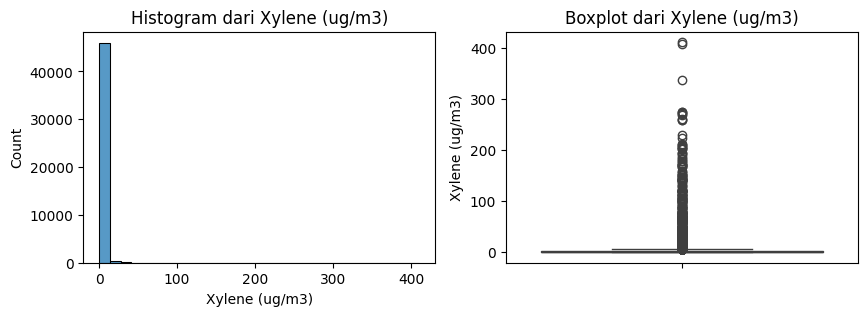

Xylene (ug/m3) - Skewness: 20.243137661715526
Xylene (ug/m3) - Kurtosis: 563.492816302317


In [47]:
# Check outlier and distribution
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram dari {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=col, data=dataframe)
        plt.title(f'Boxplot dari {col}')
        
        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')
        
check_distribution_outliers(df[num_cols], num_cols)

Hampir semuanya tidak berdistribusi normal, dan yang paling mengkhawatirkan adalah banyak outlier. Artinya imputasi harus menghindari hal hal berbau mean, std, dan hal yang sensitif dengan outlier.  
Karena outlier merupakan data valid, tidak perlu dicapping, tetapi akan dilakukan scaling, menggunakan Robust Scaler, tentunya sebelum nanti dilakukan imputasi  

Berdasarkan korelasi yang kuat dan outlier yang cukup banyak, imputasi akan dilakukan dengan KNNImputer karena cenderung lebih robust terhadap outlier dibanding IterativeImputer dll, tentunya akan lebih terbantu karena dilakukan scaling sebelum imputasi.  

Selain itu, pada fitur AT, terlihat bahwa distribusinya cukup normal, dan merupakan yang paling normal di antara yang lain

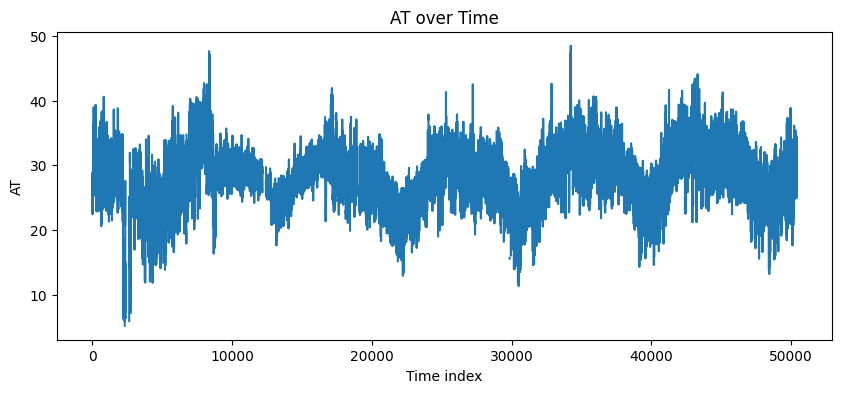

In [48]:
plt.figure(figsize=(10,4))
plt.plot(df['AT (degree C)'])
plt.title('AT over Time')
plt.xlabel('Time index')
plt.ylabel('AT')
plt.show()

Dari visualisasi AT, terlihat bahwa terdapat pola berulang, dimana karena datanya merupakan data per jam dan terdapat sekitar 50000 data, artinya pola yang terdapat dalam data mulai dari pola harian (pagi dan malam), pola musiman, hingga pola tahunan.

## Preprocessing

### Split data

In [49]:
split_1 = int(0.8 * len(df))
split_2 = int(0.9 * len(df))

train_df = df.iloc[:split_1].copy()
val_df   = df.iloc[split_1:split_2].copy()
test_df  = df.iloc[split_2:].copy()

In [50]:
# Inisialisasi scaler dan imputer
scaler = RobustScaler()
imputer = KNNImputer(n_neighbors=5)

# Fit di train
X_train_scaled = scaler.fit_transform(train_df)
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform val dan test
X_val_scaled = scaler.transform(val_df)
X_val_imputed = imputer.transform(X_val_scaled)

X_test_scaled = scaler.transform(test_df)
X_test_imputed = imputer.transform(X_test_scaled)

In [ ]:
def create_sequences(data, input_steps=5, target_index=18):
    X, y = [], []
    for i in range(len(data) - input_steps):
        X.append(data[i:i+input_steps])
        y.append(data[i+input_steps, target_index])
    return np.array(X), np.array(y)


In [55]:
# Create sequential data
num_cols = df.select_dtypes(include='number').columns
target_index = num_cols.get_loc("AT (degree C)")

X_train_seq, y_train_seq = create_sequences(X_train_imputed, 5, target_index)
X_val_seq, y_val_seq     = create_sequences(X_val_imputed, 5, target_index)
X_test_seq, y_test_seq   = create_sequences(X_test_imputed, 5, target_index)

In [56]:
print("X_train shape:", X_train_seq.shape)
print("y_train shape:", y_train_seq.shape)

X_train shape: (40315, 5, 21)
y_train shape: (40315,)


Sudah sesuai, window sizenya 5 dan ada 21 fitur

## Base Model

In [58]:
model = Sequential()
model.add(LSTM(10, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1280      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


Model baseline LSTM dengan 1 hidden layer berisi 10 neuron (hidden size 10) dengan masing masing neuron memproses 5 timestep. Kemudian, setelah melalui 1 hidden layer langsung terhubung ke regressor dengan aktivasi linear.

In [61]:
# train model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1260/1260 [==============================] - 19s 9ms/step - loss: 0.1357 - val_loss: 0.0555
Epoch 2/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0539 - val_loss: 0.0409
Epoch 3/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0490 - val_loss: 0.0390
Epoch 4/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0468 - val_loss: 0.0369
Epoch 5/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0455 - val_loss: 0.0371
Epoch 6/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0442 - val_loss: 0.0372
Epoch 7/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0436 - val_loss: 0.0357
Epoch 8/50
1260/1260 [==============================] - 11s 8ms/step - loss: 0.0427 - val_loss: 0.0348
Epoch 9/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0422 - val_loss: 0.0350
Epoch 10/50
1260/1260 [==============================] - 10s 8ms/step - l

In [76]:
y_pred = model.predict(X_test_seq)

# inverse untuk dapet nilai asli
y_pred_full = np.zeros((len(y_pred), X_test_imputed.shape[1]))
y_test_full = np.zeros((len(y_test_seq), X_test_imputed.shape[1]))

target_index = num_cols.get_loc("AT (degree C)")
y_pred_full[:, target_index] = y_pred.flatten()
y_test_full[:, target_index] = y_test_seq.flatten()

y_pred_real = scaler.inverse_transform(y_pred_full)[:, target_index]
y_test_real = scaler.inverse_transform(y_test_full)[:, target_index]

mae = mean_absolute_error(y_test_real, y_pred_real)
mse = mean_squared_error(y_test_real, y_pred_real)
r2  = r2_score(y_test_real, y_pred_real)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²:  {r2:.4f}")

158/158 [==============================] - 1s 5ms/step
MAE: 0.6641
MSE: 1.0196
R²:  0.9366


Secara rata rata, model salah memprediksi sebesar 0.6641 derajat celcius.  
Secara rata rata, jika error antara prediksi model dan data aktual dikuadrat, rata rata hasilnya sebesar 1.0196   
Model dapat menjelaskan 93,66% variasi dalam data, ini merupakan hasil yang sangat baik.

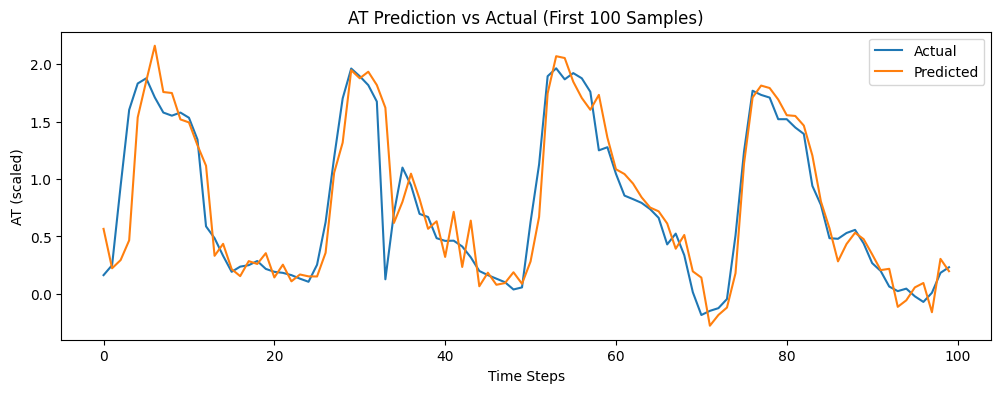

In [63]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_seq[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('AT Prediction vs Actual (First 100 Samples)')
plt.xlabel('Time Steps')
plt.ylabel('AT (scaled)')
plt.legend()
plt.show()

Dari 100 data test pertama juga prediksi model sudah memiliki pola yang mirip dengan data aktual, hanya berbeda sedikit

## Modifikasi Model

In [66]:
# Bangun model
model_mod = Sequential()
model_mod.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_mod.add(LSTM(32))
model_mod.add(Dropout(0.2))
model_mod.add(Dense(16, activation='relu'))
model_mod.add(Dense(1, activation='linear'))

In [68]:
# Compile dengan RMSprop dan learning rate lebih rendah
optimizer = RMSprop(learning_rate=0.0005)
model_mod.compile(optimizer=optimizer, loss='mse')
model_mod.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 64)             22016     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 34,977
Trainable params: 34,977
Non-trainable params: 0
_________________________________________________________________


- 64 hidden size -> Hidden size besar membantu menangkap pola kompleks dari 5 jam data multivariat  
- Layer kedua dengan 32 hidden size -> untuk menambah kapasitas model untuk mengenali dependensi jangka lebih panjang dan bertingkat  
- dropout 20% -> mengurangi overfitting (nonaktifkan 20% neuronnya)  
- tambahan dense layer dengan 16 neuron -> untuk representasi non linear supaya regresor makin kuat  
- output layer masih sama  
- optimizer jadi RMSprop -> katanya lebih stabil untuk time series  
- learning rate 0.0005 -> supaya belajar dikit dikit tapi pasti  

In [69]:
# Callback: Early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Training
history_mod = model_mod.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=75,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/75
1260/1260 [==============================] - 28s 20ms/step - loss: 0.1226 - val_loss: 0.0514
Epoch 2/75
1260/1260 [==============================] - 21s 17ms/step - loss: 0.0600 - val_loss: 0.0410
Epoch 3/75
1260/1260 [==============================] - 22s 18ms/step - loss: 0.0538 - val_loss: 0.0376
Epoch 4/75
1260/1260 [==============================] - 23s 18ms/step - loss: 0.0503 - val_loss: 0.0363
Epoch 5/75
1260/1260 [==============================] - 21s 17ms/step - loss: 0.0491 - val_loss: 0.0356
Epoch 6/75
1260/1260 [==============================] - 27s 21ms/step - loss: 0.0479 - val_loss: 0.0383
Epoch 7/75
1260/1260 [==============================] - 21s 17ms/step - loss: 0.0468 - val_loss: 0.0390
Epoch 8/75
1260/1260 [==============================] - 21s 17ms/step - loss: 0.0460 - val_loss: 0.0366
Epoch 9/75
1260/1260 [==============================] - 22s 18ms/step - loss: 0.0453 - val_loss: 0.0413
Epoch 10/75
1260/1260 [==============================] - 22s 18m

## Evaluasi

In [79]:
print("HASIL BASELINE MODEL")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²:  {r2:.4f}")

HASIL BASELINE MODEL
MAE: 0.6641
MSE: 1.0196
R²:  0.9366


In [81]:
y_pred_mod = model_mod.predict(X_test_seq)

# inverse
y_pred_mod_full = np.zeros((len(y_pred_mod), X_test_imputed.shape[1]))

y_pred_mod_full[:, target_index] = y_pred_mod.flatten()

y_pred_mod_real = scaler.inverse_transform(y_pred_mod_full)[:, target_index]

mae_mod = mean_absolute_error(y_test_real, y_pred_mod_real)
mse_mod = mean_squared_error(y_test_real, y_pred_mod_real)
r2_mod  = r2_score(y_test_real, y_pred_mod_real)

print("HASIL MODEL MODIF")
print(f"[MODIFIKASI] MAE : {mae_mod:.4f}")
print(f"[MODIFIKASI] MSE : {mse_mod:.4f}")
print(f"[MODIFIKASI] R²  : {r2_mod:.4f}")

158/158 [==============================] - 2s 12ms/step
HASIL MODEL MODIF
[MODIFIKASI] MAE : 0.6686
[MODIFIKASI] MSE : 1.0075
[MODIFIKASI] R²  : 0.9373


Secara rata rata, error antara prediksi model dan data aktual sebesar 0.6686 derajat celcius  
Jika perbedaan nilai tersebut dikuadrat, rata rata kuadrat errornya sebesar 1.0075  
Dari nilai R^2, terlihat bahwa model modifikasi ini berhasil menjelaskan 93,73% variasi dari data, nilainya sedikit lebih tinggi dari base model.  

Jika dilihat dari MAE, base model sedikit lebih baik karena errornya sedikit lebih kecil, tetapi hanya berbeda sedikit saja  
Dan jika dinilai dari R^2, sebaliknya, model modifikasi sedikit lebih baik dari base model

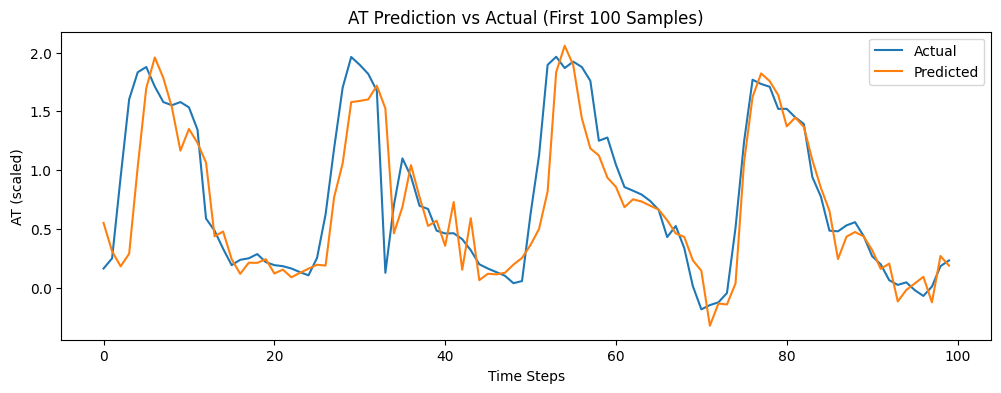

In [71]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_seq[:100], label='Actual')
plt.plot(y_pred_mod[:100], label='Predicted')
plt.title('AT Prediction vs Actual (First 100 Samples)')
plt.xlabel('Time Steps')
plt.ylabel('AT (scaled)')
plt.legend()
plt.show()

Jika dilihat visualisasi 100 data test pertamanya, grafik base model masih terlihat lebih baik karena grafik model modifikasi terlihat di beberapa titik nilainya cukup berbeda dari data aktual dan lebih sering keluar dari pola grafik aktual.

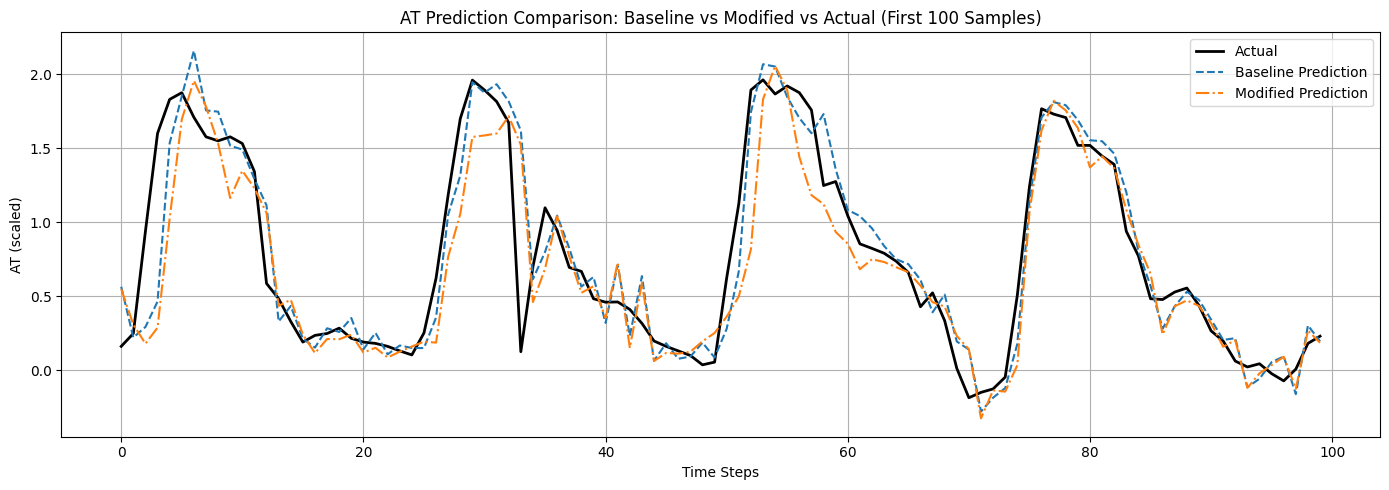

In [72]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_seq[:100], label='Actual', color='black', linewidth=2)
plt.plot(y_pred[:100], label='Baseline Prediction', linestyle='--')
plt.plot(y_pred_mod[:100], label='Modified Prediction', linestyle='-.')

plt.title('AT Prediction Comparison: Baseline vs Modified vs Actual (First 100 Samples)')
plt.xlabel('Time Steps')
plt.ylabel('AT (scaled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Jika dibandingkan langsung, terlihat bahwa baseline model memiliki nilai yang lebih dekat dengan aktual. Namun, perlu diingat ini hanya 100 data test pertama, bisa jadi di data lainnya performanya berbeda. Tetap perlu melihat metrics untuk menentukan mana yang lebih baik

Jawaban soal bonus: Ya, sangat mungkin dan memang sebaiknya menggunakan pendekatan multivariate time series, karena data memiliki banyak fitur lingkungan dan meteorologi yang berubah terhadap waktu, serta seluruh fitur memiliki timestamp yang sejajar. Serta problem dapat dikategorikan multivariate jika terdapat lebih dari satu input variabel yang saling berkaitan dalam urutan waktu yang sama — dan semua syarat tersebut dipenuhi oleh dataset ini. Kalau biasanya time series hanya menggunakan data target di timestamp sebelumnya sebagai input, di multivariate time series inputnya berupa target di timestamp sebelumnya dan diikuti oleh fitur lainnya lagi di timestamp tersebut.